# logistic regression for binary classification

<span class="burk">虽然名字中含有Regression，但是其为分类算法，离散化输出。</span>  
<span class="mark">当然他也可以做回归，拟合曲线，只不过预测值predict不使用threshold，所以输出是连续的，不是离散的。</span>  
为什么不用linear Regression做分类：线性回归拟合直线，使用threshold对预测值进行划分的分类算法做分类不是很好的算法。因为数据本身的特性可能不是一条直线，很多情况下。

## sigmoid function or logistic function  
这是为什么叫做logistic regression的原因：   
\begin{align*}& h_\theta (x) = g ( \theta^T x ) \newline \newline& z = \theta^T x \newline& g(z) = \dfrac{1}{1 + e^{-z}}\end{align*}

二分类问题理解：实质上逻辑回归在数据集上做线性划分，在线的一侧的样本z(x)大于0，另一侧小于0.在logistic function中，正是以0作为中心点，分为大于0.5和小于0.5的两部分。由于输出值在（0,1）之间，很自然就联想到概率可能性。 

线性：Θ‘x = 0代表decision boundary，决策边界。当x = [1 x1 x2]的形式出现时，则其为一条直线，将样本分开。  
非线性：当x = [1 x1^2 x2^2]的形式出现时，其为一个圆，将样本分开。  
<span class="mark">当然特征的形式可以组合得更加复杂，则决策边界也更加奇怪有趣。</span>

In [5]:
import numpy as np
import matplotlib.pyplot as plt

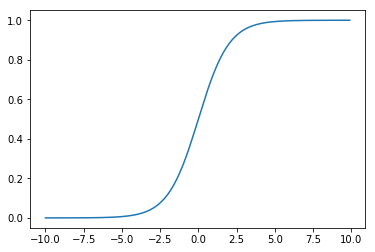

In [10]:
x = np.arange(-10, 10, 0.1)
y = 1./(1 + np.e**(-x))
plt.plot(x,y)
plt.show()

## logistic Regression model

### logistic Regression cost function：
\begin{align*}& J(\theta) = \dfrac{1}{m} \sum_{i=1}^m \mathrm{Cost}(h_\theta(x^{(i)}),y^{(i)}) \newline & \mathrm{Cost}(h_\theta(x),y) = -\log(h_\theta(x)) \; & \text{if y = 1} \newline & \mathrm{Cost}(h_\theta(x),y) = -\log(1-h_\theta(x)) \; & \text{if y = 0}\end{align*} 
首先L(x)>=0,并且偏离越大，惩罚越大。  
\begin{align*}& \mathrm{Cost}(h_\theta(x),y) = 0 \text{ if } h_\theta(x) = y \newline & \mathrm{Cost}(h_\theta(x),y) \rightarrow \infty \text{ if } y = 0 \; \mathrm{and} \; h_\theta(x) \rightarrow 1 \newline & \mathrm{Cost}(h_\theta(x),y) \rightarrow \infty \text{ if } y = 1 \; \mathrm{and} \; h_\theta(x) \rightarrow 0 \newline \end{align*}

### <span class="mark">优化对损失函数的要求</span>

损失函数是凸函数时，优化的结果收敛于全局最优。否则收敛于局部最优。  
<span class="burk">怎么才能保证损失函数是convex function?</span>  
<span class="burk">逻辑回归损失函数为什么是凸函数？</span>  
Note that writing the cost function in this way guarantees that J(θ) is convex for logistic regression.  
[为什么logistic Cost function is convex？](http://mathgotchas.blogspot.com/2011/10/why-is-error-function-minimized-in.html)

### Gradient Descent更新方式推导

\begin{align*} & J(\theta) = - \frac{1}{m} \displaystyle \sum_{i=1}^m [y^{(i)}\log (h_\theta (x^{(i)})) + (1 - y^{(i)})\log (1 - h_\theta(x^{(i)}))] \newline & h = g(X\theta) \newline & J(\theta) = \frac{1}{m} \cdot \left(-y^{T}\log(h)-(1-y)^{T}\log(1-h)\right) \newline & Repeat \; \lbrace \newline & \; \theta_j := \theta_j - \frac{\alpha}{m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} \newline & \rbrace \end{align*}

矢量更新方式： 
\begin{align*} & \theta := \theta - \frac{\alpha}{m} X^{T} (g(X \theta ) - \vec{y}) \end{align*}

<span class="mark">注意：其和linear Regression的梯度形式一致，只不过XΘ变为了g(XΘ)</span>

# advanced optimization

## optimization algorithms:  
1. Gradient descent  
2. <span class="mark">conjugate gradient  
3. <span class="mark">BFGS  
4. <span class="mark">L-BFGS</span></span></span>  
注意 ：了解这些优化算法是干什么的，里面的具体实现细节没有必要深究。如果不是专门做优化算法研究的话，只需要会用和怎么用就行。

## advantages  
1. 不需要人工选择学习率  
2. 一般比梯度下降法要快  

## disadvantage  
1. 更加复杂

## <span class="mark">Octave实现优化算法流程</span>  
1. 首先定义<span class="mark">损失函数</span>，返回两个值，分别是代价函数值J(Θ)和梯度δ  
```bash
function [jVal, gradient] = costFunction(theta)
  jVal = [...code to compute J(theta)...];
  gradient = [...code to compute derivative of J(theta)...];
end
```
2. 使用<span class="mark">optimset()</span>，设置损失对象和最大迭代次数  
```bash
options = optimset('GradObj', 'on', 'MaxIter', 100);  
```
3. 初始化参数Θ  
```bash
initialTheta = zeros(2,1);  
```
4. 使用<span class="mark">fminunc(@costF,initTheta,options)</span>，返回优化后的参数以及损失和是否收敛  
```bash
[optTheta, functionVal, exitFlag] = fminunc(@costFunction, initialTheta, options);
```

# multiclass classification

## one vs all(one-vs-rest)

一对多策略  
k个类别需要训练K个分类器，hΘ(i)  
预测过程将测试样本代入k个分类器中，选择概率最大的作为分类。

Train a logistic regression classifier hθ(x) for each class￼ to predict the probability that ￼ ￼y = i￼ ￼.  
To make a prediction on a new x, pick the class ￼that maximizes hθ(x)  
![](picture/3.jpg)

# solving the problem for overfitting

## reduce the number of features

1. 人工选择特征，删除可能作用较小的特征  
2. 算法选择特征，自动选择  

缺陷：可能删除的信息正是有用的

## regularization

防止模型过拟合  
1. 保留所有的特征信息，<span class="mark">但是能降低参数的量级(magnitude)?</span>可能是参数比较小。
2. 正则化非常有用，当我们有许多有用的特征信息时。

<span class="mark">添加正则项，防止模型过于复杂。 
正则项一般是所有参数的求和形式。但是，有时会去除掉偏置项，为了编程</span>方便，我会保留Θ0。  
二者得到的结果会有细微的差别。  
<span class="burk">但是Andrew教授实验最后不正则化theta0.不知道为什么？</span>

### 添加正则项后的损失函数形式  
\begin{align*} min_\theta\ \dfrac{1}{2m}\  \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 + \lambda\ \sum_{j=1}^n \theta_j^2 \end{align*}

对于logistic Regression，他的损失函数形式为：  
\begin{align*} J(\theta) = - \frac{1}{m} \sum_{i=1}^m \large[ y^{(i)}\ \log (h_\theta (x^{(i)})) + (1 - y^{(i)})\ \log (1 - h_\theta(x^{(i)})) \large] \end{align*}  

<span class="mark">添加正则项后，稍微做了修正：除上了2m，和样本数量联系在一块，似乎更合理</span>  
\begin{align*} & J(\theta) = - \frac{1}{m} \sum_{i=1}^m \large[ y^{(i)}\ \log (h_\theta (x^{(i)})) + (1 - y^{(i)})\ \log (1 - h_\theta(x^{(i)}))\large] + \frac{\lambda}{2m}\sum_{j=1}^n \theta_j^2  \end{align*}  

可以发现添加的是参数的平方和，为了让参数不能太大。也是为了忽略那些可能不重要的参数，让其theta尽可能的小。  
λ的选择：如果λ很大，惩罚模型复杂性越高，导致所有的参数趋向于0，那么最终导致的结果是拟合欠佳。

如果添加的正则项不包含偏置，那么，最终除了Θ0外的所有参数趋向0，最终为一条水平线。

### Gradient Descent  
\begin{align*} & \text{Repeat}\ \lbrace \newline & \ \ \ \ \theta_0 := \theta_0 - \alpha\ \frac{1}{m}\ \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_0^{(i)} \newline & \ \ \ \ \theta_j := \theta_j - \alpha\ \left[ \left( \frac{1}{m}\ \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} \right) + \frac{\lambda}{m}\theta_j \right] &\ \ \ \ \ \ \ \ \ \ j \in \lbrace 1,2...n\rbrace\newline & \rbrace \end{align*}  
整理以后得到的更新公式为：（需要注意，Andrew Ng偏向于将Θ0偏置参数区分开，不知道为什么？）  
\begin{align*} & \theta_j := \theta_j(1 - \alpha\frac{\lambda}{m}) - \alpha\frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} \end{align*}

需要注意的是： 
λα很小，而样本数m比较大，所以  
\begin{align*} & 0 < 1 - \alpha\frac{\lambda}{m} < 1 \end{align*}

### normal equation

\begin{align*}& \theta = \left( X^TX + \lambda \cdot L \right)^{-1} X^Ty \newline& \text{where}\ \ L = \begin{bmatrix} 0 & & & & \newline & 1 & & & \newline & & 1 & & \newline & & & \ddots & \newline & & & & 1 \newline\end{bmatrix}\end{align*}
需要注意的是：解析法求解最优解时\begin{align*} X^TX + \lambda \cdot L \end{align*}是可逆的。

# 实验

1. costF()
2. fminunc() 
3. <span class="mark">Regression不需要第一项</span>

注意：λ需要自己设置，λ*α/m需要小于1